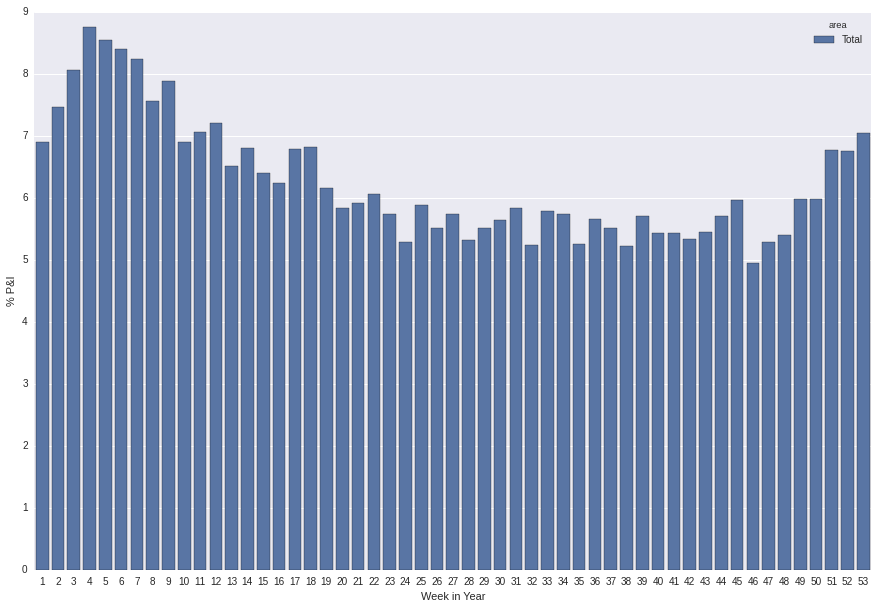

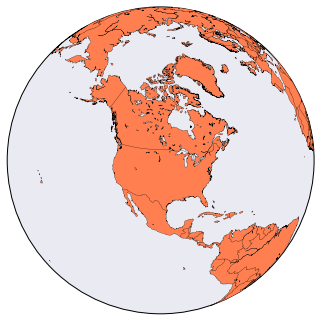

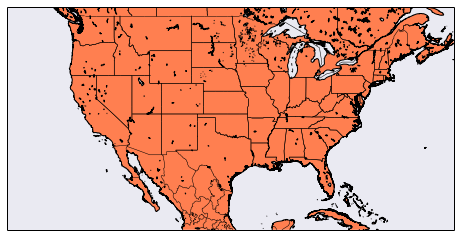

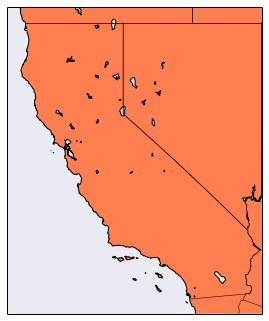

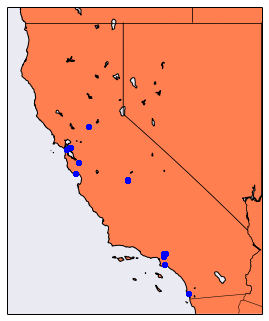

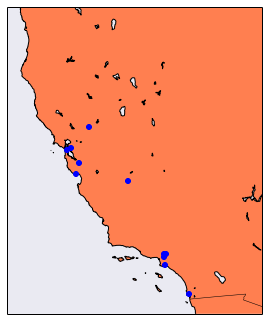

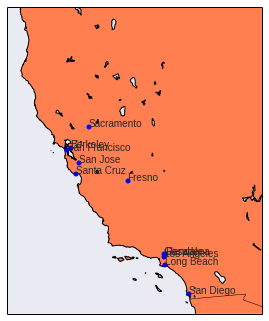

In [1]:
%run '05_more_basemap_formatted.ipynb'

Ok, there's a big mess of stuff that I'd rather not rendered in this. I'm going to look into seeing if there's a way of running a notebook but not renderring its graphical output. Alternatively (and probably what I'll end up doing) is to make a quick notebook with the relavent code, but not execution on things like maps, this way I can keep the appropriate objects, but I don't have to clutter up the beginning of every notebook.

---

Let's take a look at the test map function with labels that we made last time. We'll also correct a small mistake I made last time. I want to include the state borders, just because.

In [2]:
def test_map_labels(lons, lats, msize = 12, 
                      x1 = -125., y1 = 25., 
                      x2 = -65., y2 = 50.,
                      labels = [], 
                      labels_lons = [], 
                      labels_lats = []):
    ''' lons and lats are series or lists or longitude 
        and latitude respectively to plot on map
        x1,y1 for lower left corner long and lat
        x2,y2 for upper right corner long and lat
        '''
    
    map = Basemap(projection='merc', 
        lat_0 = (y1 + y2)/2, lon_0 = (x1 + x2)/2,
        resolution = 'h', area_thresh = 0.1,
        llcrnrlon=x1, llcrnrlat=y1,
        urcrnrlon=x2, urcrnrlat=y2)
 
    map.drawcoastlines()
    map.drawcountries()
    map.fillcontinents(color = 'coral')
    map.drawmapboundary()
    map.drawstates()
    
    
    x, y  = map(lons, lats)
    map.plot(x, y, 'bo', markersize = msize)
    
    for label, xpos, ypos in zip(labels, x, y):
        plt.text(xpos, ypos, label)

And, just so we remember how we got to the last map in the previous post:

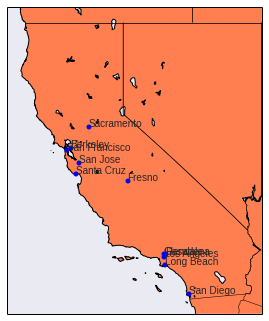

In [3]:
test_map_labels(c_long, c_lat, 5, 
                -125., 32., -114., 42.5, 
                cali_labels, c_long, c_lat)

For an explanation on how we acquired each of the parameters, see the previous post. But for now, let's move those labels around a little, so we can actually see what they all say.

Just so we're clear on what each of the labels are, let's look at that list first.

In [4]:
cali_labels

['Berkeley',
 'Fresno',
 'Glendale',
 'Long Beach',
 'Los Angeles',
 'Pasadena',
 'Sacramento',
 'San Diego',
 'San Francisco',
 'San Jose',
 'Santa Cruz']

Comparing this against the map above, we can see we've got to change the locations of the labels for: Berkeley, Pasadena, and maybe Los Angeles, to make these readable. It would be nice if we could make a procedural solution for this, but for now we're going to use the tools we have to get an ad hoc fix for the problem at hand.

So, we should take a look at our minimized DataFrame to see the latitude and longitude we're going to have to change.

In [5]:
cali_min

,area,deaths,lat,long,city,state
115,"Berkeley, CA",15,37.869884,-122.270539,Berkeley,CA
116,"Fresno, CA",137,36.740680,-119.785728,Fresno,CA
117,"Glendale, CA",29,34.146333,-118.248640,Glendale,CA
119,"Long Beach, CA",55,33.766724,-118.192397,Long Beach,CA
120,"Los Angeles, CA",224,34.053491,-118.245317,Los Angeles,CA
121,"Pasadena, CA",27,34.147454,-118.144266,Pasadena,CA
123,"Sacramento, CA",207,38.579333,-121.490896,Sacramento,CA
124,"San Diego, CA",166,32.715691,-117.161717,San Diego,CA
125,"San Francisco, CA",108,37.777122,-122.419637,San Francisco,CA
126,"San Jose, CA",196,37.338582,-121.885570,San Jose,CA


Let's see if we can fix one of these problems (Berkeley, to be specific) simply by moving the longitude over a bit.

In [6]:
c_long[0] = c_long[0] - 1

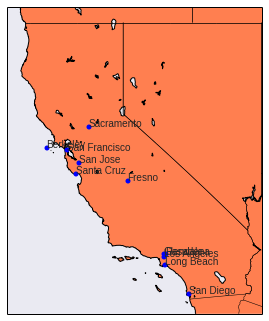

In [7]:
test_map_labels(c_long, c_lat, 5, 
                -125., 32., -114., 42.5, 
                cali_labels, c_long, c_lat)

Ahh, that was a silly mistake. We're actually going to want to make a separate set of locations specifically for the labels. Right, cracking on.

In [8]:
c_long[0] = c_long[0] + 1

In [9]:
l_long = c_long
l_lat = c_lat
l_long[0] = l_long[0] - 1.5

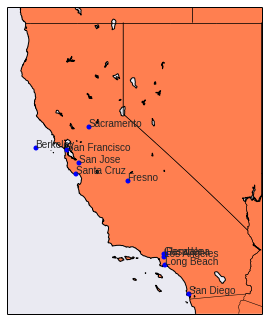

In [10]:
test_map_labels(c_long, c_lat, 5, 
                -125., 32., -114., 42.5, 
                cali_labels, l_long, l_lat)

In [11]:
c_long

[-123.77053867699971,
 -119.78572815899969,
 -118.24863950799971,
 -118.19239725799969,
 -118.24531669099969,
 -118.14426554199969,
 -121.49089596399972,
 -117.16171662299968,
 -122.4196366869997,
 -121.8855697949997,
 -122.03094750099973]

Ok, I'm not sure exactly what happened there.

Woops screwed up again. Fixing fixing.

In [12]:
c_long[0] = c_long[0] + 2

In [13]:
c_long

[-121.77053867699971,
 -119.78572815899969,
 -118.24863950799971,
 -118.19239725799969,
 -118.24531669099969,
 -118.14426554199969,
 -121.49089596399972,
 -117.16171662299968,
 -122.4196366869997,
 -121.8855697949997,
 -122.03094750099973]

There we go..

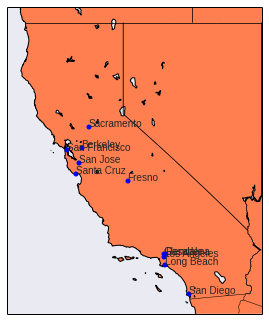

In [14]:
test_map_labels(c_long, c_lat, 5, 
                -125., 32., -114., 42.5, 
                cali_labels, l_long, l_lat)

In [15]:
l_long[0] = l_long[0] - 2

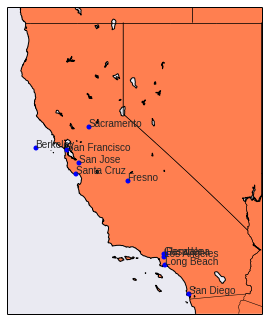

In [16]:
test_map_labels(c_long, c_lat, 5, 
                -125., 32., -114., 42.5, 
                cali_labels, l_long, l_lat)

Ok, what the shit is going on here? Changing l_long is changing c_long which is where l_long is copied from. This is not nice.

I also think I have a secondary problem, I make no referene to the label long and lat in the map function, so any changes to those lists will not actually effect the end result (except of course that at the moment changes to them change the lists they're copied from). To get around the first big issue, let's just initialize l_long/lat in the same way we did with c_long/lat, that way they're not connected.

In [17]:
c_long

[-123.77053867699971,
 -119.78572815899969,
 -118.24863950799971,
 -118.19239725799969,
 -118.24531669099969,
 -118.14426554199969,
 -121.49089596399972,
 -117.16171662299968,
 -122.4196366869997,
 -121.8855697949997,
 -122.03094750099973]

In [18]:
c_long[0] = c_long[0] + 2
c_long

[-121.77053867699971,
 -119.78572815899969,
 -118.24863950799971,
 -118.19239725799969,
 -118.24531669099969,
 -118.14426554199969,
 -121.49089596399972,
 -117.16171662299968,
 -122.4196366869997,
 -121.8855697949997,
 -122.03094750099973]

In [19]:
l_lat = [cali_min['lat'].loc[row]
            for row in cali_min.index]
l_long = [cali_min['long'].loc[row]
            for row in cali_min.index]

There, now the lists should match up, but not because they're direct copies of each other. But let's fucking test this.

In [20]:
l_long[0] = l_long[0] - 1.75
c_long

[-121.77053867699971,
 -119.78572815899969,
 -118.24863950799971,
 -118.19239725799969,
 -118.24531669099969,
 -118.14426554199969,
 -121.49089596399972,
 -117.16171662299968,
 -122.4196366869997,
 -121.8855697949997,
 -122.03094750099973]

Oh thank the maker. There's that problem out the window.

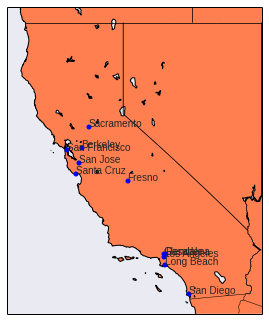

In [21]:
test_map_labels(c_long, c_lat, 5, 
                -125., 32., -114., 42.5, 
                cali_labels, l_long, l_lat)

Ok, and as I pointed out a bit ago, changing just l_long/lat doesn't actually do anything, let's change that now.

In [22]:
def test_map_labels(lons, lats, msize = 12, 
                      x1 = -125., y1 = 25., 
                      x2 = -65., y2 = 50.,
                      labels = [], 
                      labels_lons = [], 
                      labels_lats = []):
    ''' lons and lats are series or lists or longitude 
        and latitude respectively to plot on map
        x1,y1 for lower left corner long and lat
        x2,y2 for upper right corner long and lat
        '''
    
    map = Basemap(projection='merc', 
        lat_0 = (y1 + y2)/2, lon_0 = (x1 + x2)/2,
        resolution = 'h', area_thresh = 0.1,
        llcrnrlon=x1, llcrnrlat=y1,
        urcrnrlon=x2, urcrnrlat=y2)
 
    map.drawcoastlines()
    map.drawcountries()
    map.fillcontinents(color = 'coral')
    map.drawmapboundary()
    map.drawstates()
    
    
    x, y = map(lons, lats)
    i, j = map(labels_lons, labels_lats)
    map.plot(x, y, 'bo', markersize = msize)
    
    for label, xpos, ypos in zip(labels, i, j):
        plt.text(xpos, ypos, label)

God, I hope that works.

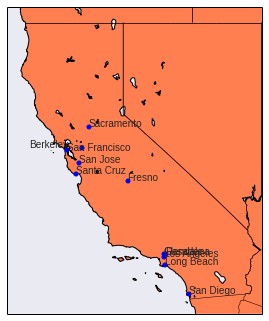

In [23]:
test_map_labels(c_long, c_lat, 5, 
                -125., 32., -114., 42.5, 
                cali_labels, l_long, l_lat)

Alright, that did what I wanted! I love it when shit works.

So, let's just do the few small changes that we need to in order to make this map readable!

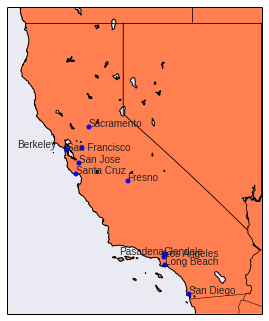

In [24]:
l_long[0] -= 0.5
l_long[5] -= 2.0
test_map_labels(c_long, c_lat, 5, 
                -125., 32., -114., 42.5, 
                cali_labels, l_long, l_lat)

Ooooh, now that we've got Pasadena out of the way, we can see that Glendale also needs to move. That's me for ya, always forgetting about Glendale.

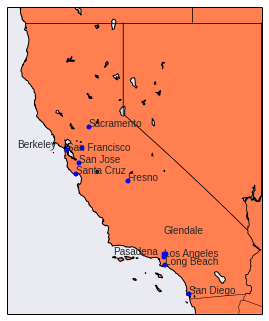

In [25]:
l_long[5] -= 0.25
l_lat[2] += .75
test_map_labels(c_long, c_lat, 5, 
                -125., 32., -114., 42.5, 
                cali_labels, l_long, l_lat)

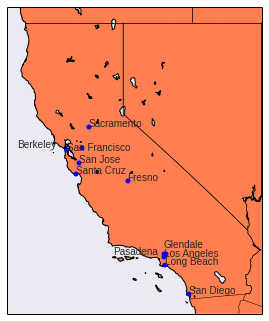

In [26]:
l_lat[2] -= .5
test_map_labels(c_long, c_lat, 5, 
                -125., 32., -114., 42.5, 
                cali_labels, l_long, l_lat)

Just look at that lovely, (almost) entirely readable map!. Now, it should be super simple to combine this type of map with the information that we'd gathered from visualizations in posts past. Let's try a little of that.

In [27]:
cali_min

,area,deaths,lat,long,city,state
115,"Berkeley, CA",15,37.869884,-122.270539,Berkeley,CA
116,"Fresno, CA",137,36.740680,-119.785728,Fresno,CA
117,"Glendale, CA",29,34.146333,-118.248640,Glendale,CA
119,"Long Beach, CA",55,33.766724,-118.192397,Long Beach,CA
120,"Los Angeles, CA",224,34.053491,-118.245317,Los Angeles,CA
121,"Pasadena, CA",27,34.147454,-118.144266,Pasadena,CA
123,"Sacramento, CA",207,38.579333,-121.490896,Sacramento,CA
124,"San Diego, CA",166,32.715691,-117.161717,San Diego,CA
125,"San Francisco, CA",108,37.777122,-122.419637,San Francisco,CA
126,"San Jose, CA",196,37.338582,-121.885570,San Jose,CA


We had a simple little bar graph function which we'll test out on this set just to make sure we can use it.

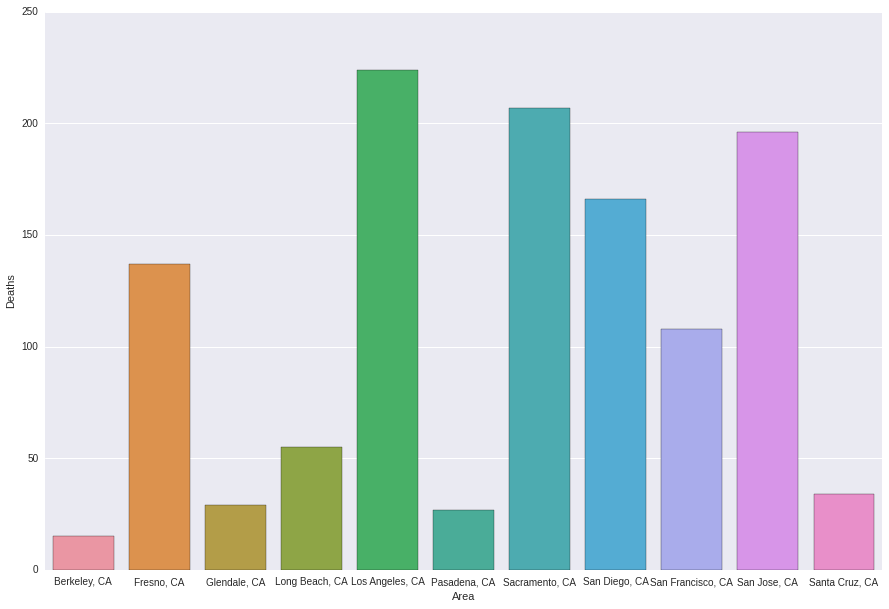

In [28]:
bar_graph2(cali_min['area'], cali_min['deaths'], 'Area', 'Deaths')

Nice! I mean, we're talking about death, so it's not that nice, but give me a break. 

The simplest way of combining this information is to run one after the other.

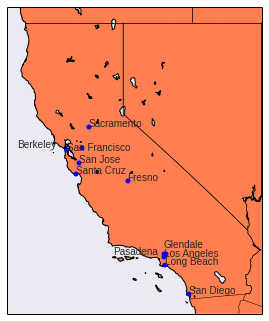

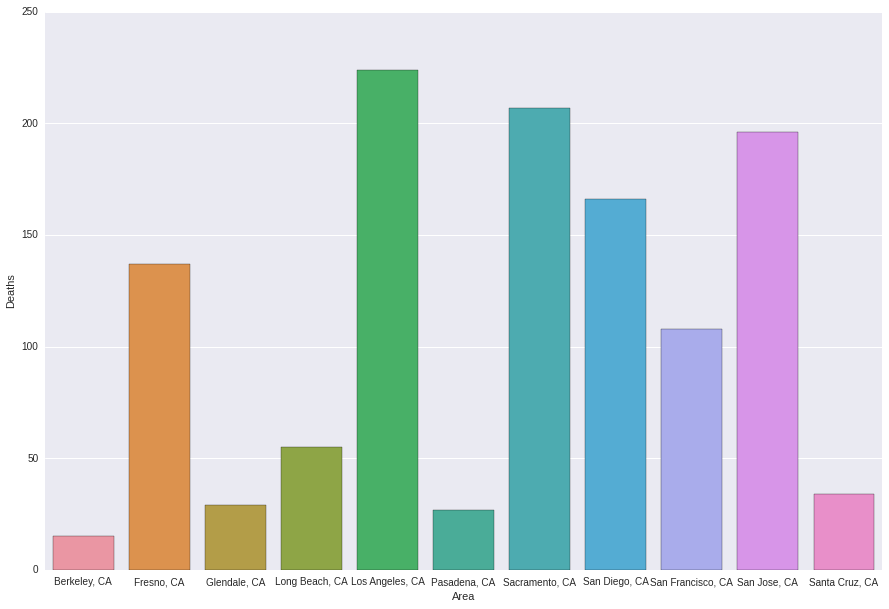

In [30]:
l_lat[2] += .5
test_map_labels(c_long, c_lat, 5, 
                -125., 32., -114., 42.5, 
                cali_labels, l_long, l_lat)

bar_graph2(cali_min['area'], cali_min['deaths'], 'Area', 'Deaths')

Obviously, this would be much more impactful if we weren't running an exploratory computing setup, meaning we can just scroll up to collect the same information. That being said, it's still nice to be able to put it all in the same place. We could resize things, and generally make them easier to consume, but I think we've played arond with this set of data for quite long enough. We'll leave this here. And next time we'll try to deal with an entirely different set of data, and maybe some new packages and techniques to play around with.